Written By Soner Kar 

# Imports

In [7]:
import scipy
from scipy.io import loadmat

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#To make the dataframe look nice in other compilers too
from IPython.display import display 

In [10]:
import random

In [11]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# DATA PREPROCESSING

## All Process In One Cell

In [6]:
for i in range(1, 51):
    filename_to_load = '%d.mat' % i
    mat = scipy.io.loadmat(filename_to_load)

    #In order to work on the data, we must convert the data to numpy array.
    data_of_mat = list(mat.items())
    array_of_mat = np.array(data_of_mat)

    df = pd.DataFrame(array_of_mat, columns=['Sub-band Type','Sample Values'])

    #Let's delete the first 3 lines of the data frame
    df.drop([0,1,2], axis=0, inplace=True)
    df = df.reindex([7,3,5,8,4,6])

    #Get indexes from 1 to 6 
    df.reset_index(inplace=True)

    #Delete the old index 3-8
    df.drop(['index'], axis=1, inplace = True)
    
    filename_to_save = 'df%d.pkl' % i
    df.to_pickle(filename_to_save)
    

In [13]:
#load DataFrames
dfs_dict = {}
for i in range(1,51):
    filename_to_save = 'df%d.pkl' % i
    dfs_dict["df%s" %i] = pd.read_pickle(filename_to_save)

In [14]:
df_big = pd.DataFrame()

for i in range(1,51):
    df_big = df_big.append(dfs_dict["df%s" %i])

In [15]:
print('Shape of df_big ->',df_big.shape)
display(df_big)

#Reindexing
print('\nReindexing in progress...\n\n')

#Get indexes from 1 to 6 
df_big.reset_index(inplace=True)

#Delete the old index 3-8
df_big.drop(['index'], axis=1, inplace = True)

display(df_big)

Shape of df_big -> (300, 2)


,Sub-band Type,Sample Values
0,Teta_CH7,"[[-0.004084962147901478], [1.6717847888155337]..."
1,Alpha_CH7,"[[-0.003180670281219208], [-0.0331596507974786..."
2,Beta_CH7,"[[-0.0017131329025576994], [5.707026139248794]..."
3,Teta_CH8,"[[-0.0030409720956448274], [-1.771659988609280..."
4,Alpha_CH8,"[[-0.0023677892782807356], [-4.00923241426465]..."
...,...,...
1,Alpha_CH7,"[[-0.0013818352246098735], [33.56721389887232]..."
2,Beta_CH7,"[[-0.0007442668307578047], [85.74982419920684]..."
3,Teta_CH8,"[[-0.0006486486993644554], [-10.65437203477094..."
4,Alpha_CH8,"[[-0.0005050567342717388], [-11.75656247320132..."



Reindexing in progress...




,Sub-band Type,Sample Values
0,Teta_CH7,"[[-0.004084962147901478], [1.6717847888155337]..."
1,Alpha_CH7,"[[-0.003180670281219208], [-0.0331596507974786..."
2,Beta_CH7,"[[-0.0017131329025576994], [5.707026139248794]..."
3,Teta_CH8,"[[-0.0030409720956448274], [-1.771659988609280..."
4,Alpha_CH8,"[[-0.0023677892782807356], [-4.00923241426465]..."
...,...,...
295,Alpha_CH7,"[[-0.0013818352246098735], [33.56721389887232]..."
296,Beta_CH7,"[[-0.0007442668307578047], [85.74982419920684]..."
297,Teta_CH8,"[[-0.0006486486993644554], [-10.65437203477094..."
298,Alpha_CH8,"[[-0.0005050567342717388], [-11.75656247320132..."


In [16]:
#Creating of 'Person Number' Column 
personNumberList1 = list()
for i in range(1,51):
    personNumberList1.append(i)
    
personNumberList2 = list()
for i in range(1,51):
    personNumberList2.append(i)

personNumberList3 = list()
for i in range(1,51):
    personNumberList3.append(i)
    
personNumberList4 = list()
for i in range(1,51):
    personNumberList4.append(i)

personNumberList5 = list()
for i in range(1,51):
    personNumberList5.append(i)
    
personNumberList6 = list()
for i in range(1,51):
    personNumberList6.append(i)

    
personNumberList = personNumberList1 + personNumberList2 + personNumberList3 + personNumberList4 + personNumberList5 + personNumberList6
personNumberList.sort()
print('Person Number List:\n',personNumberList)
print(f'\nLength of personNumberList -> {len(personNumberList)}' )    
    
#Adding of 'Person Number' Column to DataFrame    
df_big['Person Number'] = personNumberList
    
print('\033[1m' + '\033[4m' + '\033[31m' + '\n↓ df_big Last Version ↓ ' + '\033[0m')
display(df_big)

Person Number List:
 [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 

,Sub-band Type,Sample Values,Person Number
0,Teta_CH7,"[[-0.004084962147901478], [1.6717847888155337]...",1
1,Alpha_CH7,"[[-0.003180670281219208], [-0.0331596507974786...",1
2,Beta_CH7,"[[-0.0017131329025576994], [5.707026139248794]...",1
3,Teta_CH8,"[[-0.0030409720956448274], [-1.771659988609280...",1
4,Alpha_CH8,"[[-0.0023677892782807356], [-4.00923241426465]...",1
...,...,...,...
295,Alpha_CH7,"[[-0.0013818352246098735], [33.56721389887232]...",50
296,Beta_CH7,"[[-0.0007442668307578047], [85.74982419920684]...",50
297,Teta_CH8,"[[-0.0006486486993644554], [-10.65437203477094...",50
298,Alpha_CH8,"[[-0.0005050567342717388], [-11.75656247320132...",50


# CONSTRUCTION OF MODEL

In [17]:
#Let's say 'df' instead of 'df_big' from now on, for ease of writing code
df = df_big

In [18]:
#How to reach a row of Sample Values, following code is for example of it
df['Sample Values'][2] #this is the 2. row of the Sample Values 

array([[-1.71313290e-03],
       [ 5.70702614e+00],
       [ 9.51071679e+00],
       ...,
       [-2.03804358e+01],
       [-1.21274871e+01],
       [-1.68441579e-03]])

In [19]:
#Let's look at a short information of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sub-band Type  300 non-null    object
 1   Sample Values  300 non-null    object
 2   Person Number  300 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 7.2+ KB


As you can see, there are 300 data in both columns, and none of these data is null. This shows that our DataFrame is correct and complete.

In [20]:
#Let's get detail information about the DataFrame
display(df['Sample Values'].describe(),'Person Number')

count                                                   300
unique                                                  300
top       [[-0.006584814112599448], [-4.83586173107352],...
freq                                                      1
Name: Sample Values, dtype: object

'Person Number'

In [21]:
display(df['Person Number'].describe())

count    300.000000
mean      25.500000
std       14.454981
min        1.000000
25%       13.000000
50%       25.500000
75%       38.000000
max       50.000000
Name: Person Number, dtype: float64

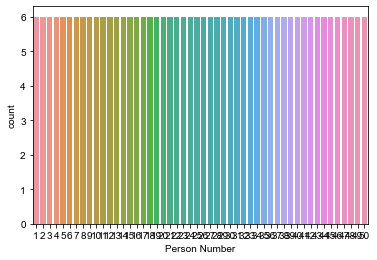

In [22]:
sns.countplot(x='Person Number', data=df)
sns.set(rc = {'figure.figsize':(20,8)})

Each of the 50 people has 6 sub-bands, as it should be.

In [23]:
df = pd.DataFrame(data=df, index=np.arange(3700))
display(df)

,Sub-band Type,Sample Values,Person Number
0,Teta_CH7,"[[-0.004084962147901478], [1.6717847888155337]...",1.0
1,Alpha_CH7,"[[-0.003180670281219208], [-0.0331596507974786...",1.0
2,Beta_CH7,"[[-0.0017131329025576994], [5.707026139248794]...",1.0
3,Teta_CH8,"[[-0.0030409720956448274], [-1.771659988609280...",1.0
4,Alpha_CH8,"[[-0.0023677892782807356], [-4.00923241426465]...",1.0
...,...,...,...
3695,NaN,NaN,NaN
3696,NaN,NaN,NaN
3697,NaN,NaN,NaN
3698,NaN,NaN,NaN


In [24]:
#Changing of 'Person Number' Column
list1 = list()
list_person_number = list()
for i in range(1,51):
    list1 = [i] * 74
    list_person_number += list1

print(f'Length of list_person_number -> {len(list_person_number)}')

df['Person Number'] = list_person_number
display(df)

Length of list_person_number -> 3700


,Sub-band Type,Sample Values,Person Number
0,Teta_CH7,"[[-0.004084962147901478], [1.6717847888155337]...",1
1,Alpha_CH7,"[[-0.003180670281219208], [-0.0331596507974786...",1
2,Beta_CH7,"[[-0.0017131329025576994], [5.707026139248794]...",1
3,Teta_CH8,"[[-0.0030409720956448274], [-1.771659988609280...",1
4,Alpha_CH8,"[[-0.0023677892782807356], [-4.00923241426465]...",1
...,...,...,...
3695,NaN,NaN,50
3696,NaN,NaN,50
3697,NaN,NaN,50
3698,NaN,NaN,50


In [25]:
df['CH7_Teta']  = ""
df['CH7_Alpha'] = ""
df['CH7_Beta']  = ""
df['CH8_Teta']  = ""
df['CH8_Alpha'] = ""
df['CH8_Beta']  = ""

display(df)

,Sub-band Type,Sample Values,Person Number,CH7_Teta,CH7_Alpha,CH7_Beta,CH8_Teta,CH8_Alpha,CH8_Beta
0,Teta_CH7,"[[-0.004084962147901478], [1.6717847888155337]...",1,,,,,,
1,Alpha_CH7,"[[-0.003180670281219208], [-0.0331596507974786...",1,,,,,,
2,Beta_CH7,"[[-0.0017131329025576994], [5.707026139248794]...",1,,,,,,
3,Teta_CH8,"[[-0.0030409720956448274], [-1.771659988609280...",1,,,,,,
4,Alpha_CH8,"[[-0.0023677892782807356], [-4.00923241426465]...",1,,,,,,
...,...,...,...,...,...,...,...,...,...
3695,NaN,NaN,50,,,,,,
3696,NaN,NaN,50,,,,,,
3697,NaN,NaN,50,,,,,,
3698,NaN,NaN,50,,,,,,


In [26]:
list_CH7_Teta = []
list_CH7_Alpha = []
list_CH7_Beta = []
list_CH8_Teta = []
list_CH8_Alpha = []
list_CH8_Beta = []

In [27]:
for i in range(0,300,6):
    list_CH7_Teta += np.split(df['Sample Values'][i],(37000/500))
df['CH7_Teta'] = list_CH7_Teta

for i in range(1,300,6):
    list_CH7_Alpha += np.split(df['Sample Values'][i],(37000/500))
df['CH7_Alpha'] = list_CH7_Alpha

for i in range(2,300,6):
    list_CH7_Beta += np.split(df['Sample Values'][i],(37000/500))
df['CH7_Beta'] = list_CH7_Beta

for i in range(3,300,6):
    list_CH8_Teta += np.split(df['Sample Values'][i],(37000/500))
df['CH8_Teta'] = list_CH8_Teta

for i in range(4,300,6):
    list_CH8_Alpha += np.split(df['Sample Values'][i],(37000/500))
df['CH8_Alpha'] = list_CH8_Alpha

for i in range(5,300,6):
    list_CH8_Beta += np.split(df['Sample Values'][i],(37000/500))
df['CH8_Beta'] = list_CH8_Beta

display(df)

,Sub-band Type,Sample Values,Person Number,CH7_Teta,CH7_Alpha,CH7_Beta,CH8_Teta,CH8_Alpha,CH8_Beta
0,Teta_CH7,"[[-0.004084962147901478], [1.6717847888155337]...",1,"[[-0.004084962147901478], [1.6717847888155337]...","[[-0.003180670281219208], [-0.0331596507974786...","[[-0.0017131329025576994], [5.707026139248794]...","[[-0.0030409720956448274], [-1.771659988609280...","[[-0.0023677892782807356], [-4.00923241426465]...","[[-0.001275309088556036], [-11.791365504759348..."
1,Alpha_CH7,"[[-0.003180670281219208], [-0.0331596507974786...",1,"[[-0.26722691219993416], [-0.48016212523268254...","[[-1.1142004228107798], [-1.834641975119802], ...","[[-2.790887975805429], [-5.663769345147099], [...","[[-3.073462324603013], [-2.2986639365842163], ...","[[1.0912504854944716], [1.8986157359294653], [...","[[-3.5625187991072855], [-3.2274285461881567],..."
2,Beta_CH7,"[[-0.0017131329025576994], [5.707026139248794]...",1,"[[0.6233524303716272], [0.9595295442967361], [...","[[-4.54339385040624], [-3.11516664501373], [-1...","[[-1.9829723424722423], [1.359740346492062], [...","[[5.277788840912537], [5.6112329121359386], [5...","[[-7.117677651012773], [-6.127317908358047], [...","[[-2.3665878996649843], [2.410672764974865], [..."
3,Teta_CH8,"[[-0.0030409720956448274], [-1.771659988609280...",1,"[[1.2584180307260189], [2.22122227024731], [3....","[[3.415530631139729], [4.458146318823448], [5....","[[-0.6062430036950939], [1.1524222105953938], ...","[[2.7708221390923593], [3.4935549442629297], [...","[[1.6960532088332878], [2.554345196308095], [3...","[[-4.152121644211854], [-2.651557223823981], [..."
4,Alpha_CH8,"[[-0.0023677892782807356], [-4.00923241426465]...",1,"[[-10.458166249417605], [-10.065422150216731],...","[[-0.12767966477631895], [-1.166567543768434],...","[[-3.2194848246447036], [-3.8009108326878693],...","[[-10.28963130592839], [-9.964741555937687], [...","[[-5.050024904510659], [-5.057874040084894], [...","[[-1.6829725217711358], [-1.5721923178082216],..."
...,...,...,...,...,...,...,...,...,...
3695,NaN,NaN,50,"[[7.744340034958487], [9.202419646984747], [10...","[[3.725214774904042], [-0.17425329168250453], ...","[[3.719823844765703], [6.936044916931747], [7....","[[0.8203096610582126], [2.3587921115841293], [...","[[7.670331636768958], [7.987054707847693], [7....","[[1.2718505158204823], [-0.0758172079159657], ..."
3696,NaN,NaN,50,"[[6.713630680799007], [6.860620910462033], [6....","[[7.115821617997293], [9.728340972397428], [11...","[[-0.7386496950241462], [-2.5904007437872627],...","[[1.5075306536915352], [2.566925603444694], [3...","[[-1.1377725724074965], [-1.60066969987679], [...","[[2.7614517175779265], [0.7476342850677369], [..."
3697,NaN,NaN,50,"[[7.036796365167894], [7.105769519620418], [6....","[[-3.9925726959398613], [-3.942736331122514], ...","[[-3.542623937488306], [-5.022899920715326], [...","[[-9.373913640782813], [-8.886432869057487], [...","[[-11.995680510110963], [-13.222345154555759],...","[[0.3644908802028761], [-3.8394751985126083], ..."
3698,NaN,NaN,50,"[[-4.315815859691411], [-4.562782675640729], [...","[[20.35107910252717], [18.48006872815578], [15...","[[-5.119408145776214], [-7.202219896652009], [...","[[-1.7375886659760882], [-1.479192856254134], ...","[[16.94600088992131], [15.970698286360255], [1...","[[-8.507579066900803], [-7.761143766990539], [..."


In [28]:
df.drop(['Sub-band Type','Sample Values'], axis=1, inplace=True)
display(df)

,Person Number,CH7_Teta,CH7_Alpha,CH7_Beta,CH8_Teta,CH8_Alpha,CH8_Beta
0,1,"[[-0.004084962147901478], [1.6717847888155337]...","[[-0.003180670281219208], [-0.0331596507974786...","[[-0.0017131329025576994], [5.707026139248794]...","[[-0.0030409720956448274], [-1.771659988609280...","[[-0.0023677892782807356], [-4.00923241426465]...","[[-0.001275309088556036], [-11.791365504759348..."
1,1,"[[-0.26722691219993416], [-0.48016212523268254...","[[-1.1142004228107798], [-1.834641975119802], ...","[[-2.790887975805429], [-5.663769345147099], [...","[[-3.073462324603013], [-2.2986639365842163], ...","[[1.0912504854944716], [1.8986157359294653], [...","[[-3.5625187991072855], [-3.2274285461881567],..."
2,1,"[[0.6233524303716272], [0.9595295442967361], [...","[[-4.54339385040624], [-3.11516664501373], [-1...","[[-1.9829723424722423], [1.359740346492062], [...","[[5.277788840912537], [5.6112329121359386], [5...","[[-7.117677651012773], [-6.127317908358047], [...","[[-2.3665878996649843], [2.410672764974865], [..."
3,1,"[[1.2584180307260189], [2.22122227024731], [3....","[[3.415530631139729], [4.458146318823448], [5....","[[-0.6062430036950939], [1.1524222105953938], ...","[[2.7708221390923593], [3.4935549442629297], [...","[[1.6960532088332878], [2.554345196308095], [3...","[[-4.152121644211854], [-2.651557223823981], [..."
4,1,"[[-10.458166249417605], [-10.065422150216731],...","[[-0.12767966477631895], [-1.166567543768434],...","[[-3.2194848246447036], [-3.8009108326878693],...","[[-10.28963130592839], [-9.964741555937687], [...","[[-5.050024904510659], [-5.057874040084894], [...","[[-1.6829725217711358], [-1.5721923178082216],..."
...,...,...,...,...,...,...,...
3695,50,"[[7.744340034958487], [9.202419646984747], [10...","[[3.725214774904042], [-0.17425329168250453], ...","[[3.719823844765703], [6.936044916931747], [7....","[[0.8203096610582126], [2.3587921115841293], [...","[[7.670331636768958], [7.987054707847693], [7....","[[1.2718505158204823], [-0.0758172079159657], ..."
3696,50,"[[6.713630680799007], [6.860620910462033], [6....","[[7.115821617997293], [9.728340972397428], [11...","[[-0.7386496950241462], [-2.5904007437872627],...","[[1.5075306536915352], [2.566925603444694], [3...","[[-1.1377725724074965], [-1.60066969987679], [...","[[2.7614517175779265], [0.7476342850677369], [..."
3697,50,"[[7.036796365167894], [7.105769519620418], [6....","[[-3.9925726959398613], [-3.942736331122514], ...","[[-3.542623937488306], [-5.022899920715326], [...","[[-9.373913640782813], [-8.886432869057487], [...","[[-11.995680510110963], [-13.222345154555759],...","[[0.3644908802028761], [-3.8394751985126083], ..."
3698,50,"[[-4.315815859691411], [-4.562782675640729], [...","[[20.35107910252717], [18.48006872815578], [15...","[[-5.119408145776214], [-7.202219896652009], [...","[[-1.7375886659760882], [-1.479192856254134], ...","[[16.94600088992131], [15.970698286360255], [1...","[[-8.507579066900803], [-7.761143766990539], [..."


In [34]:
df.head(2)

,Person Number,CH7_Teta,CH7_Alpha,CH7_Beta,CH8_Teta,CH8_Alpha,CH8_Beta
0,1,"[[-0.004084962147901478], [1.6717847888155337]...","[[-0.003180670281219208], [-0.0331596507974786...","[[-0.0017131329025576994], [5.707026139248794]...","[[-0.0030409720956448274], [-1.771659988609280...","[[-0.0023677892782807356], [-4.00923241426465]...","[[-0.001275309088556036], [-11.791365504759348..."
1,1,"[[-0.26722691219993416], [-0.48016212523268254...","[[-1.1142004228107798], [-1.834641975119802], ...","[[-2.790887975805429], [-5.663769345147099], [...","[[-3.073462324603013], [-2.2986639365842163], ...","[[1.0912504854944716], [1.8986157359294653], [...","[[-3.5625187991072855], [-3.2274285461881567],..."


In [29]:
y = df['Person Number'].values
x = df.drop('Person Number', axis=1).values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=8)

model = Sequential()

model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=3, activation='relu'))
model.add(Dense(units=3, activation='relu'))
model.add(Dense(units=1, activation='softmax'))

earlyStopping = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

model.compile(loss='categorical_crossentropy',optimizer='adam')

model.fit(x=x_train, y=y_train, validation_data=(x_test,y_test), epochs=100, verbose=1, callbacks=[earlyStopping])

In [31]:
print(type(x_train[1][1]))

<class 'numpy.ndarray'>


In [32]:
print(x_train[0])

[array([[ -0.30149114],
       [  1.00222397],
       [  2.2426784 ],
       [  3.36756311],
       [  4.3292913 ],
       [  5.08692889],
       [  5.60786322],
       [  5.86914402],
       [  5.85844282],
       [  5.57459228],
       [  5.02768332],
       [  4.23871587],
       [  3.23881609],
       [  2.06804992],
       [  0.77387801],
       [ -0.59068799],
       [ -1.9691561 ],
       [ -3.30377105],
       [ -4.53779156],
       [ -5.61773979],
       [ -6.49553503],
       [ -7.13042819],
       [ -7.49066122],
       [ -7.55478661],
       [ -7.31259544],
       [ -6.76561706],
       [ -5.92716981],
       [ -4.82195947],
       [ -3.48524012],
       [ -1.96156893],
       [ -0.30320179],
       [  1.43181008],
       [  3.18175055],
       [  4.88351515],
       [  6.47494724],
       [  7.89714533],
       [  9.09665454],
       [ 10.02745992],
       [ 10.6527062 ],
       [ 10.94607927],
       [ 10.89279784],
       [ 10.49017918],
       [  9.74775869],
       [  

In [33]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape  = ',x_test.shape)
print('y_test.shape  = ',y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
x_train.shape =  (2960, 6)
y_train.shape =  (2960,)
x_test.shape  =  (740, 6)
y_test.shape  =  (740,)
